# Autoencoders - adapt neural network into unsupervised learning

Neural nets can be used for both classification and regression problems
they can also contribute to unsupervised learning problems

Classification
Regression
Unsupervised

supervised - this is cat - this is dog - what this is?
unsupervised - these are the total images - figure out the similarity in these


Using neural networks for unsupervised learning

![image](https://i0.wp.com/sefiks.com/wp-content/uploads/2018/03/autoencoder.jpeg)


## Autoencoding has 2 outputs
Autoencoder Neural Network
their design make them special 

- they have same nodes for both input and output
- Hidden layers must be symmetric about the center
- The number of nodes in hidden layer decrease from left to center
- increase from center to right

### Also
- Input features are reduced and restored respectively
- input can be compressed as the value of centroid layer's
- if input is same as output
- compression operation is not lossless
    
    auto encoder - reduction
    
    auto decoder - enlargement
    
    
Discard the labels

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
# to allow it to run on GPU with less VRAM

from tensorflow.keras.datasets import mnist
import numpy as np

from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# we will forget about the y part or the lables of images 
# with labels it is - supervised
# without labels it is - unsupervised - 
# we dont know what is round known as (p.s. zero)

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# the 2d image as input is not required
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)

# input of auto encoder is 784 - so single dimensional matrix as input
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test  = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

In [4]:
np.prod(x_train.shape[1:])

784

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [6]:
# Creating the AutoEncoder Model - input and output same
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense( 32, activation='relu')) # symmetric centroid
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [7]:
# training the model - but why binary crossentropy? okay due to 2 color class either black or white 784 pixels
# and so not categorical
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, x_train, epochs=3, validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1372 - accuracy: 0.8070 - val_loss: 0.1037 - val_accuracy: 0.8118
Epoch 2/3
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1006 - accuracy: 0.8132 - val_loss: 0.0960 - val_accuracy: 0.8127
Epoch 3/3
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0958 - accuracy: 0.8137 - val_loss: 0.0930 - val_accuracy: 0.8129


In [9]:
# just for future
model.save('mnist_autoencoder.h5')

In [11]:
def test_restoration(model):
    """
    the model with encoder and decoder combined is given as input
    to encode - need starting layers till centroid
    to decode - from centroid till end
    """
    #  TODO: Implement this with plt.figure and subplots
    #  TODO: Understand the K.function part of keras
    
    # output of the model - encoder and decoder both - on test set (global)
    decoded_imgs = model.predict(x_test) 
    
    # finding the central value of model - basically encoder (layer0 and layer1)
    # why only 0 and 1 - infact inp of 0 and op of 1 - but not op of 0 and ip of 1 ? why    
    get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
    
    # getting output on 2 images
    for i in range(2):
        print('orignal')
        plt.imshow(x_test[i].reshape(28,28))
        plt.show()
        
        print('reconstructed')
        plt.imshow(decoded_imgs[i].reshape(28,28))
        plt.show()
        
        print('compressed')
        current_compressed = get_3rd_layer_output([x_test[i:i+1]])[0][0]
        plt.imshow(current_compressed.reshape(8,4))
        plt.show()

In [13]:
# model.layers[0].output
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


In [16]:
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
get_3rd_layer_output.summary() # 'EagerExecutionFunction' object has no attribute 'summary'

AttributeError: 'EagerExecutionFunction' object has no attribute 'summary'

orignal


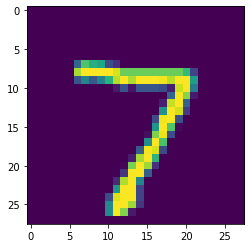

reconstructed


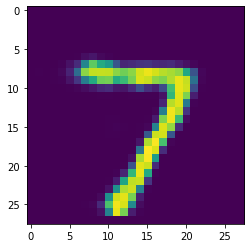

compressed


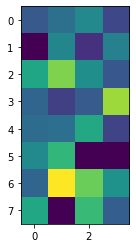

orignal


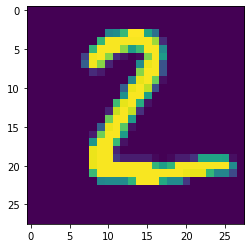

reconstructed


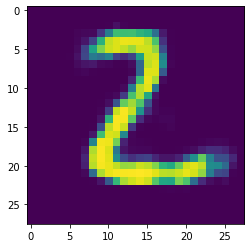

compressed


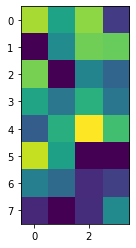

In [16]:
test_restoration(model)

In [19]:
# the restored ones are blurred, but are clearly readable
# compressed representation is still meaningful

# we dont need to show all the representations,
# we can directly save the compressed versions

def autoencode(model):
    decoded_imgs = model.predict(x_test)
    get_3rd_layer_output = K.function([model.layers[0].input],[model.layers[1].output])
    compressed = get_3rd_layer_output([x_test])
    return compressed

com = autoencode(model)

In [28]:
len(com[0][0]) # 32 pixels in one image
len(com[0]) # 1000

10000

## Results
The input image was of 784 whereas compressed rep is of 32

it is 24 times smaller than the original image

Herein, complex input features enforces traditiona unsupervised learning algo
k-means and knn

if all features are included, it will confuse the algo
idea is you should apply the auto-encoder, reduce input features and extract meaningful data first. 

Then apply unsupervised learning to compressed representation. so clustering algorithm works high performance and provide meaningful results

### why autoencoder and decoder are not differently trained ?
the input is the image and the output is the image
so the middle layer of the network depends upon the whole layer
and during training it is modified or updated!! 

if we would use both alone, then we will just get some random compressed output that is just not the good one as we dont have the final result to check the loss function on that.

in the other codes we use - trained models on imagenet and remove the last layers of that network to generate the input.
so the hidden layers are already trained and optimized with the label of that class
so no need to train the model again
but here again we are defining the model from scratch so have to train 
and for training we optimize the loss function and moreover we need the input and specific output for the model as that is SUPERVISED - once we are sure the model is learning perfectly - we just use that for predictions and compressing the images

In [69]:
# from tensorflow.compat.v1.estimator.experimental.ops import clustering_ops

unsupervised_model = tf.compat.v1.estimator.experimental.KMeans(
    10, use_mini_batch=False
#     distance_metric = clustering_ops.SQUARED_EUCLIDEAN_DISTANCE,
#     initial_clusters = tf.contrib.learn.KMeansClustering.RANDOM_INIT
    )

def train_input_fn():
    data = tf.constant(com[0], tf.float32)
    return (data, None)

unsupervised_model.train(input_fn=train_input_fn, steps=500)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Vinay\\AppData\\Local\\Temp\\tmpni2sg9lw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tens

following samples are clustered in same cluster:
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Vinay\AppData\Local\Temp\tmpni2sg9lw\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
1 2 

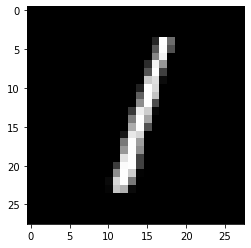

3 4 5 

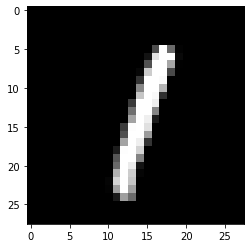

6 7 8 9 10 11 12 13 14 

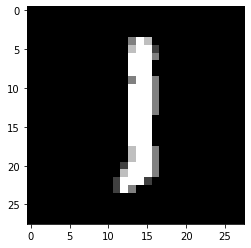

15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

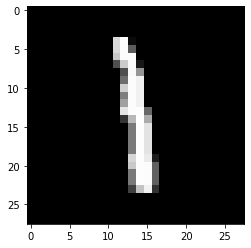

30 31 

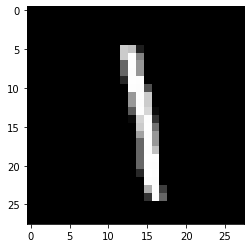

32 33 34 35 36 37 

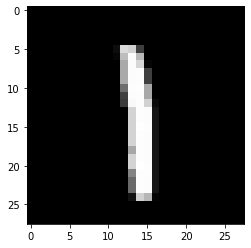

38 39 

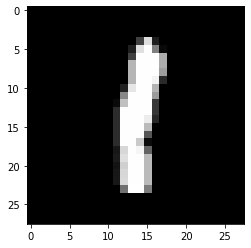

40 

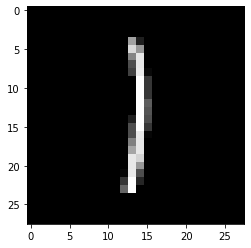

41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 

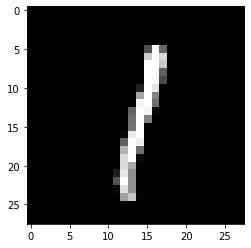

58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 

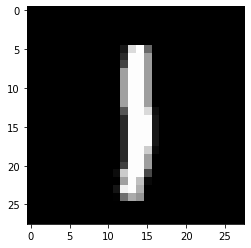

75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 

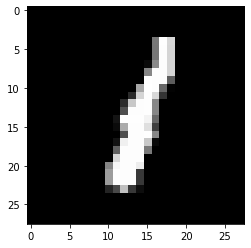

90 91 92 93 94 

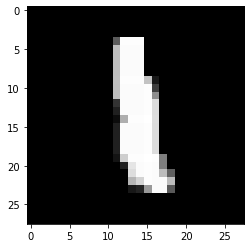

95 96 

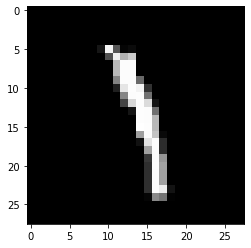

97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 

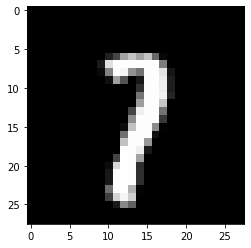

112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 

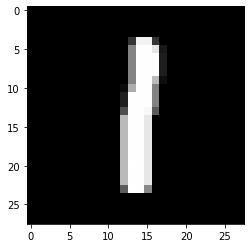

136 137 138 139 140 141 142 143 

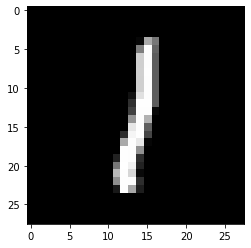

144 145 

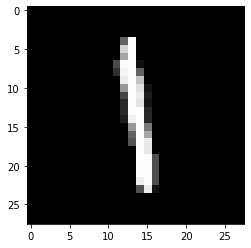

146 147 148 149 150 151 152 153 154 

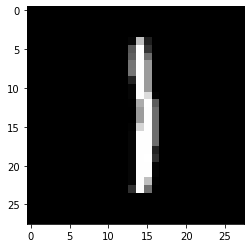

155 156 157 158 159 160 161 162 163 164 165 166 167 168 

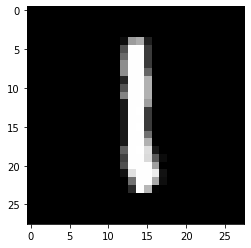

169 170 171 172 173 174 175 176 

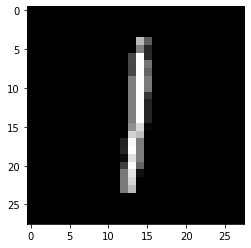

177 178 

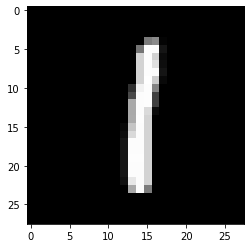

179 180 

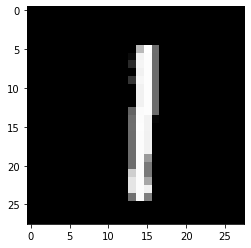

181 182 183 184 185 186 187 188 189 

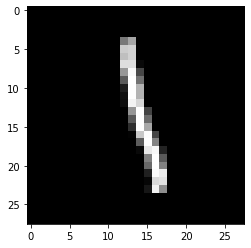

190 191 

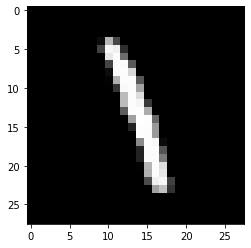

192 193 194 195 196 

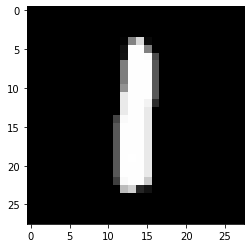

197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 

In [145]:
clusters = unsupervised_model.predict(input_fn=train_input_fn)

print("following samples are clustered in same cluster:")

# clusters.__next__() - can use this to get another sample - iterator
# predict function is having QueueRunner - that will generate data forever 
# - thats why value of i was not stopping anywhere

# WARNING:tensorflow:Input graph does not use tf.data.Dataset or contain a QueueRunner.
# That means predict yields forever. This is probably a mistake.
index = 0
for i in clusters:
    current_cluster = i['cluster_index']
    features = x_test[index]
    
    if index < 200 and current_cluster == 4:
        plt.imshow(x_test[index].reshape(28, 28))
        plt.gray()
        plt.show()
       
    index = index + 1
    print(index,end=' ')
    if index == 1000:
        break

In [139]:
clusters.__next__()

{'all_distances': array([ 461.76758,  597.79614,  971.57825,  497.37427, 1019.6262 ,
         679.93604,  669.47046,  666.8386 ,  138.09644,  417.47473],
       dtype=float32),
 'cluster_index': 8}

# Clustering
clustering is unsupervised learning method 
that is just used to cluster the datapoints given to it in a pool of many data points

we asked the model to create 10 clusters
the output was infinite - but that is fine too we stopped using break

op contains 2 parts - all_distances and cluster_index

distance is the distance of particular object in the whole pool of given n numbers of cluster 
say 10 clusters for mnist dataset
whosoever the distance is less - that point belong to that cluster

cluster index is the prediction where the item must go

in the example above - cluster_index is 8 - and in the distances we can see - 8 is having 138 distance from that point
clearly that is the nearest cluster

comparison bw knn and clustering will be the topic for next disucssion


In [50]:
len(com[0])

10000